# Regression on California housing dataset
using keras functional API

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets
from keras import Model, layers
from keras.utils import plot_model

## Load data

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.california_housing.load_data(version='small')

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

Train data shape: (480, 8)
Test data shape: (120, 8)


## Pre-processing

In [ ]:
# Normalization
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [ ]:
x_train.shape

(480, 8)

### Split the dataset in two feature groups

In [ ]:
x_train_1 = x_train[:, :3]
x_train_2 = x_train[:, 3:]

(480, 5)

## Model Design

### Two inputs / Two outputs

In [ ]:
inp1 = layers.Input(shape=(3,))
inp2 = layers.Input(shape=(5,))

L1 = layers.Dense(32, activation='relu', name='L1')(inp2)
L2 = layers.Dense(32, activation='relu', name='L2')(L1)

concat = layers.Concatenate()([inp1, L2])

L3 = layers.Dense(16, activation='relu', name='L3')(concat)
L4 = layers.Dense(8, activation='relu', name='L4')(L3)

out = layers.Dense(1)(L4)

model = Model(inputs=[inp1, inp2], outputs=out)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L1 (Dense)                │ (None, 32)             │            192 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L2 (Dense)                │ (None, 32)             │          1,056 │ L1[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 35)             │              0 │ input_layer_2[0][0],   │
│ (Concatenate)             │                        │                │ L2[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L3 (Dense)                │ (None, 16)             │            576 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L4 (Dense)                │ (None, 8)              │            136 │ L3[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │              9 │ L4[0][0]               │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,969 (7.69 KB)

 Trainable params: 1,969 (7.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
inp1 = layers.Input(shape=(3,))
inp2 = layers.Input(shape=(5,))

L1 = layers.Dense(32, activation='relu', name='L1')(inp2)
L2 = layers.Dense(32, activation='relu', name='L2')(L1)

concat = layers.Concatenate()([inp1, L2])

L3 = layers.Dense(16, activation='relu', name='L3')(concat)
L4 = layers.Dense(8, activation='relu', name='L4')(L3)

out = layers.Dense(1)(L4)

model = Model(inputs=[inp1, inp2], outputs=out)

In [ ]:
inp1 = layers.Input(shape=(3,))
inp2 = layers.Input(shape=(5,))

L1 = layers.Dense(32, activation='relu', name='L1')(inp2)
L2 = layers.Dense(32, activation='relu', name='L2')(L1)

concat = layers.Concatenate()([inp1, L2])

L3 = layers.Dense(16, activation='relu', name='L3')(concat)
L4 = layers.Dense(8, activation='relu', name='L4')(L3)

out = layers.Dense(1)(L4)

model = Model(inputs=[inp1, inp2], outputs=out)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L1 (Dense)                │ (None, 32)             │            192 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L2 (Dense)                │ (None, 32)             │          1,056 │ L1[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 35)             │              0 │ input_layer_2[0][0],   │
│ (Concatenate)             │                        │                │ L2[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L3 (Dense)                │ (None, 16)             │            576 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L4 (Dense)                │ (None, 8)              │            136 │ L3[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │              9 │ L4[0][0]               │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,969 (7.69 KB)

 Trainable params: 1,969 (7.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.save('model.h5')

In [ ]:
%%capture
plot_model(model, 'model.png', show_shapes=True, show_layer_names=True)

## Training

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [ ]:
history = model.fit(x=[x_train_1, x_train_2], y=y_train,
                    epochs=200, batch_size=16,
                    validation_split=0.1)

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 51946950656.0000 - mae: 204730.0938 - val_loss: 49728794624.0000 - val_mae: 198329.1094
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 56484659200.0000 - mae: 213473.5469 - val_loss: 49728507904.0000 - val_mae: 198328.3906
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 52179140608.0000 - mae: 204869.9062 - val_loss: 49727295488.0000 - val_mae: 198325.5781
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 54139080704.0000 - mae: 207963.2656 - val_loss: 49722945536.0000 - val_mae: 198315.5000
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 54130667520.0000 - mae: 209661.4375 - val_loss: 49708511232.0000 - val_mae: 198282.5000
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53045821440.0000 - mae: 206113.4219 - val_loss: 49669001216.0000 - val_mae: 198192.8281
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49876615168.0000 - mae: 200148.2500 - val_loss: 4957839

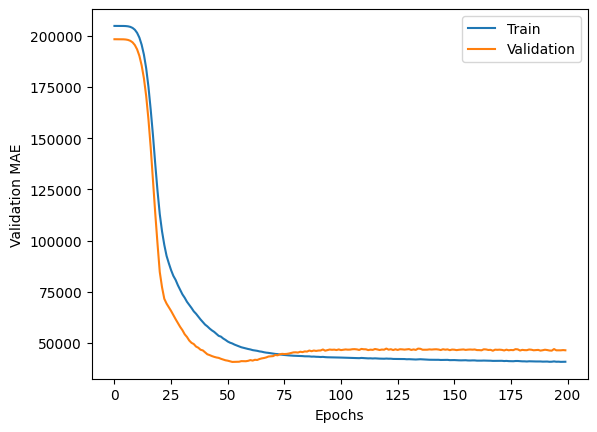

In [ ]:
plt.plot(history.history["mae"], label='Train')
plt.plot(history.history["val_mae"], label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

## Evaluation

In [ ]:
x_test_1 = x_test[:, :3]
x_test_2 = x_test[:, 3:]
eval_results = model.evaluate([x_test_1, x_test_2], y_test)
print(f'Validation MAE: {eval_results[1]} $')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5623922688.0000 - mae: 44824.1094
Validation MAE: 45138.54296875 $


---

### Two inputs / Two outputs

In [ ]:
inp1 = layers.Input(shape=(3,), name='input1')
inp2 = layers.Input(shape=(5,), name='input2')

L1 = layers.Dense(32, activation='relu', name='L1')(inp2)
L2 = layers.Dense(32, activation='relu', name='L2')(L1)

concat = layers.Concatenate()([inp1, L2])

L3 = layers.Dense(16, activation='relu', name='L3')(concat)
L4 = layers.Dense(8, activation='relu', name='L4')(L3)

out1 = layers.Dense(1, name='out1')(L3)
out2 = layers.Dense(1, name='out2')(L4)

model2 = Model(inputs=[inp1, inp2], outputs=[out1, out2])

plot_model(model2, 'model2.pdf', show_shapes=True, show_layer_names=True)

## Training

In [ ]:
model2.compile(optimizer='adam', loss=['mse', 'mse'],
               metrics=['mae', 'mae'])

In [ ]:
history2 = model2.fit([x_train_1, x_train_2], [y_train, y_train],
                      epochs=200, batch_size=16,
                      validation_split=0.1)

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 107715510272.0000 - out1_loss: 53857677312.0000 - out1_mae: 208470.1875 - out2_loss: 53857824768.0000 - out2_mae: 208470.5312 - val_loss: 99457171456.0000 - val_out1_loss: 49728356352.0000 - val_out1_mae: 198327.9844 - val_out2_loss: 49728811008.0000 - val_out2_mae: 198329.1875
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 98944131072.0000 - out1_loss: 49471782912.0000 - out1_mae: 199386.1250 - out2_loss: 49472356352.0000 - out2_mae: 199387.6719 - val_loss: 99455836160.0000 - val_out1_loss: 49727352832.0000 - val_out1_mae: 198325.3750 - val_out2_loss: 49728491520.0000 - val_out2_mae: 198328.3281
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 97739816960.0000 - out1_loss: 48869273600.0000 - out1_mae: 198887.0156 - out2_loss: 48870535168.0000 - out2_mae: 198890.4531 - val_loss: 99451338752.0000 - val_out1_loss: 49724620800.0000 - val_out1_mae: 198318.2500 - val_out2_loss: 49726717952.0000 - val_out2_ma

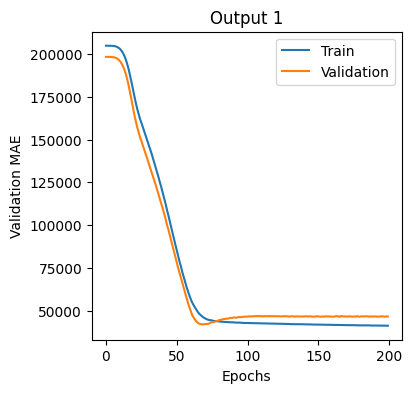

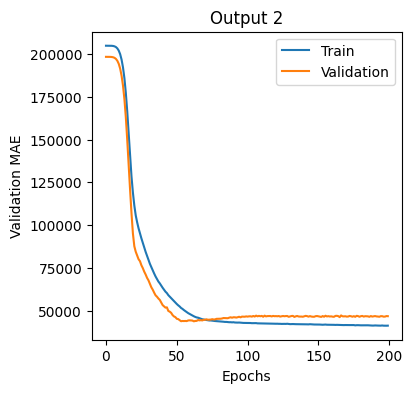

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(history2.history["out1_mae"], label='Train')
plt.plot(history2.history["val_out1_mae"], label='Validation')
plt.title('Output 1')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.legend()

plt.figure(figsize=(4,4))
plt.plot(history2.history["out2_mae"], label='Train')
plt.plot(history2.history["val_out2_mae"], label='Validation')
plt.title('Output 2')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

## Evaluation

In [ ]:
x_test_1 = x_test[:, :3]
x_test_2 = x_test[:, 3:]
eval_results = model2.evaluate([x_test_1, x_test_2], [y_test, y_test])
print(f'Validation MAE for output 1: {eval_results[3]} $')
print(f'Validation MAE for output 2: {eval_results[4]} $')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11200812032.0000 - out1_loss: 5566511104.0000 - out1_mae: 44395.7773 - out2_loss: 5569907200.0000 - out2_mae: 44468.3477
Validation MAE for output 1: 44951.07421875 $
Validation MAE for output 2: 44989.625 $


## Using Keras Callbacks

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.california_housing.load_data(version='large')

In [ ]:
print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

Train data shape: (16512, 8)
Test data shape: (4128, 8)


In [ ]:
# Normalization
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [ ]:
x_train_1 = x_train[:, :3]
x_train_2 = x_train[:, 3:]

In [ ]:
inp1 = layers.Input(shape=(3,))
inp2 = layers.Input(shape=(5,))

L1 = layers.Dense(64, activation='relu', name='L1')(inp2)
L2 = layers.Dense(64, activation='relu', name='L2')(L1)

concat = layers.Concatenate()([inp1, L2])

L3 = layers.Dense(32, activation='relu', name='L3')(concat)
L4 = layers.Dense(16, activation='relu', name='L4')(L3)

out = layers.Dense(1)(L4)

model = Model(inputs=[inp1, inp2], outputs=out)

### Define callbacks

In [ ]:
from keras import callbacks

In [ ]:
checkpoint = callbacks.ModelCheckpoint('drive/MyDrive/model_checkpoint.h5',
                                       monitor='val_mae',
                                       save_best_only=True)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10)
logger = callbacks.CSVLogger('drive/MyDrive/log.csv')
rlrop = callbacks.ReduceLROnPlateau(monitor='val_mae', patience=5)

my_callbacks = [checkpoint, early_stopping, logger, rlrop]

In [ ]:
# define a custom loss
import tensorflow as tf
from keras.saving import register_keras_serializable

@register_keras_serializable()
def custom_loss_function(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [ ]:
model.compile(optimizer='adam', loss=custom_loss_function, metrics=['mae'])

In [ ]:
history = model.fit([x_train_1, x_train_2], y_train,
                    epochs=150, batch_size=128,
                    validation_split=0.2,
                    callbacks=my_callbacks)

Epoch 1/150
101/104 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5823984128.0000 - mae: 56249.9922

104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 5827509248.0000 - mae: 56264.5352 - val_loss: 5736382976.0000 - val_mae: 56019.5039 - learning_rate: 0.0010
Epoch 2/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5991928832.0000 - mae: 57241.7070 - val_loss: 5720632320.0000 - val_mae: 56396.5078 - learning_rate: 0.0010
Epoch 3/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5836249600.0000 - mae: 56557.2656 - val_loss: 5720311296.0000 - val_mae: 56135.6445 - learning_rate: 0.0010
Epoch 4/150
 95/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5843513344.0000 - mae: 56831.0117

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5847164928.0000 - mae: 56812.2891 - val_loss: 5712016896.0000 - val_mae: 55934.7734 - learning_rate: 0.0010
Epoch 5/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5867728896.0000 - mae: 56860.0820

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5867933696.0000 - mae: 56858.5039 - val_loss: 5732481536.0000 - val_mae: 55884.8281 - learning_rate: 0.0010
Epoch 6/150
 95/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5889968640.0000 - mae: 56174.6523

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5889745920.0000 - mae: 56212.5664 - val_loss: 5717897728.0000 - val_mae: 55585.9375 - learning_rate: 0.0010
Epoch 7/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5894066688.0000 - mae: 56426.0352 - val_loss: 5696140288.0000 - val_mae: 56087.2656 - learning_rate: 0.0010
Epoch 8/150
 48/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6187146240.0000 - mae: 57988.1250

KeyboardInterrupt: 

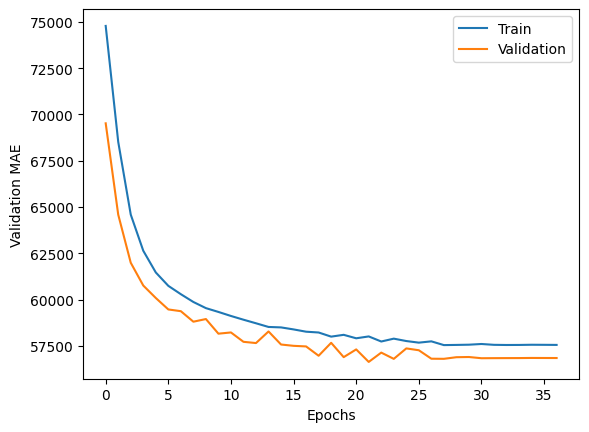

In [ ]:
plt.plot(history.history["mae"][5:], label='Train')
plt.plot(history.history["val_mae"][5:], label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.legend()

## Deploy

In [ ]:
from keras.models import load_model

loaded_model = load_model('drive/MyDrive/model_checkpoint.h5')
loaded_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L1 (Dense)                │ (None, 64)             │            384 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_22            │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L2 (Dense)                │ (None, 64)             │          4,160 │ L1[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_13            │ (None, 67)             │              0 │ input_layer_22[0][0],  │
│ (Concatenate)             │                        │                │ L2[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L3 (Dense)                │ (None, 32)             │          2,176 │ concatenate_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ L4 (Dense)                │ (None, 16)             │            528 │ L3[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 1)              │             17 │ L4[0][0]               │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,267 (28.39 KB)

 Trainable params: 7,265 (28.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)